# Project: Decision Tree Implementation

## Submitted By : Ayushi

### Project is Divided in 3 parts :
        1) converted continuos to discrete value and then printing decision tree steps
        2) Creating Decision Tree Classifier
        3) Visualizing iris_dataset_tree and OR_tree

### Import required libraries

In [31]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pydotplus
import math
from collections import Counter

In [32]:
iris = datasets.load_iris()

In [33]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
X_iris = iris.data
Y_iris = iris.target

In [35]:
X_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
Y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
iris = pd.DataFrame(X_iris , columns = ["SL" , "SW" , "PL" , "PW"])

In [38]:
iris

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
iris["Y"] = Y_iris

In [40]:
iris

,SL,SW,PL,PW,Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### In the below function , I am converting continuos values of dataset to discrete values 

#### For this conversion , I am using pandas.cut function 

In [41]:
def CONTINUOS_TO_DISCRETE(column, bins):
    return pd.cut(column, bins=bins, labels=False)

# converting the continuos values to discrete values , except the last column which is the Y column
features = iris.columns[:-1]
for feature in features:
    k = 5  # Number of groups
    iris[feature] = CONTINUOS_TO_DISCRETE(iris[feature], bins=k) # calling the function



In [42]:
print(iris.head())

   SL  SW  PL  PW  Y
0   1   3   0   0  0
1   0   2   0   0  0
2   0   2   0   0  0
3   0   2   0   0  0
4   0   3   0   0  0


## Printing the Decision tree steps as specified 

In [43]:
def print_tree(iris , features , level) :
    # printing level 
    print("Level : " , level)
    # In this , printing current display node
    display_output(iris)
    current_entropy = calculate_entropy(iris)  # calculating entropy of current node
    # printing current entropy
    print("Current Entropy  is = " , current_entropy)
    
    # Now , Let's see base cases
    # Here , In this case there can be two base bases :
    # 1) current node is leaf node
    # 2) node is pure 
    
    if len(features) == 0 or purity_check(iris) :
        print("Reached leaf Node")
        return
    
    # if the node is not pure or leaf node , the let's find the gain ratio 
    # using gain_ratio we can find the best feature to split upon 
    # Because feature with maximum gain_ratio will be the best feature
    
    maxi_gain = -math.inf      # Here , we are setting maxi_gain as negative infinity 
    max_gain_feature = 0   # to store the best feature
    for feature in features :
        gain_ratio = gain_ratio_calculation(iris , feature)   # calculating gain ratio
        # Here , trying to find the best feature 
        if gain_ratio > maxi_gain :
            maxi_gain = gain_ratio
            max_gain_feature = feature
    
    print("Splitting on feature" , feature , "with gain ratio" , maxi_gain)
    
    # In new_feature , storing all the feature from the iris column except the max_gain_feature
    new_feature = [feature for feature in features if feature != max_gain_feature]
    
    feature_unique_value = list(set(iris[max_gain_feature]))
    # recursive call on every category 
    for value in feature_unique_value :
        sub_data = iris[iris[max_gain_feature] == value]
        
        # calling recursion
        
        print_tree(sub_data , new_feature , level+1)
        print()


In [44]:
## finding entropy 
### formula for entropy is sum(pi*(log(pi)))
def calculate_entropy(iris) :  
    val_count = iris['Y'].value_counts()
    val_count_dict = val_count.to_dict()
    for val in val_count_dict :
        probabilities = val_count / len(iris)
        entropy_value = -np.sum(probabilities * np.log2(probabilities))

    return entropy_value 


In [45]:
def gain_ratio_calculation(iris , feature) :
    # information gain
    # total_information_gain = info_original - info_feature 
    ''' In the above formula of information gain  :
            info_original is parent entropy 
            info_feature is info required after splitting on feature f #or# basically you can also say 
            that it is weighted average of child entropies .       
        '''
    parent_entropy = calculate_entropy(iris)
    
    # Now , calculating weighted average of child entropy
    
    weighted_child_entropy = 0 
    unique_values = iris[feature].unique()
    
    for value in unique_values :
        sub_child = iris[iris[feature]==value]
        
        sub_child_entropy = calculate_entropy(sub_child)
        weight = len(sub_child) / len(iris)
        weighted_child_entropy += weight * sub_child_entropy
    
    # calculating total information gain 
    total_information_gain = parent_entropy - weighted_child_entropy
    
    # calculating split_information
    # split_info = -sum((|Di| / D) * log(|Di| / D))
    # In the above formula , Di = count of ith child
                            # D = total count
    
    split_info = 0
    
    for value in unique_values :
        pro = len(iris[iris[feature] == value]) / len(iris)
        split_info -= pro * math.log2(pro) 
        
    if split_info == 0 :       
        return 0
    
    # finally , calculating gain ratio
    # gain_ratio = info_gain / split_info
    
    gain_ratio = total_information_gain / split_info
    
    return gain_ratio

In [46]:
# In this function , we are checking if the node is leaf node or not , 
# i.e., it has only 1 value
def purity_check(iris) :
    # creating dictionary
    val_count_dict = iris["Y"].value_counts().to_dict()
    # Now , checking if the dictionary i.e., val_count_dict only has 1 , 
    # if yes -> then return true , else -> return false
    if len(val_count_dict) == 1 :
        return True
    else :
        return False

In [47]:
def display_output(iris) :
    # using counter counting the occurences of each unique value 
    value_count = Counter(iris.Y)
    # Now , sorting the count by keys
    sorted_val_count = sorted(value_count.items())
    
    for key , count in sorted_val_count :
        print("Count of " , key , "is" , count)

In [48]:
features = iris.columns[:-1]
print_tree(iris, features, 0)

Level :  0
Count of  0 is 50
Count of  1 is 50
Count of  2 is 50
Current Entropy  is =  1.584962500721156
Splitting on feature PW with gain ratio 0.6345315547087995
Level :  1
Count of  0 is 50
Current Entropy  is =  -0.0
Reached leaf Node

Level :  1
Count of  1 is 3
Current Entropy  is =  -0.0
Reached leaf Node

Level :  1
Count of  1 is 33
Count of  2 is 1
Current Entropy  is =  0.19143325481419343
Splitting on feature PW with gain ratio 0.14552679703433022
Level :  2
Count of  1 is 5
Current Entropy  is =  -0.0
Reached leaf Node

Level :  2
Count of  1 is 27
Current Entropy  is =  -0.0
Reached leaf Node

Level :  2
Count of  1 is 1
Count of  2 is 1
Current Entropy  is =  1.0
Splitting on feature SW with gain ratio 1.0
Level :  3
Count of  2 is 1
Current Entropy  is =  -0.0
Reached leaf Node

Level :  3
Count of  1 is 1
Current Entropy  is =  -0.0
Reached leaf Node



Level :  1
Count of  1 is 14
Count of  2 is 33
Current Entropy  is =  0.8786744932173093
Splitting on feature PW wit

## Decision Tree Implementation

In [49]:
class decision_Tree_node :
    def __init__(self , category = None , feature = None , output_y = None) :
        self.category = category
        self.feature = feature 
        self.output_y = output_y
        self.children = []

In [50]:
class Decision_Tree_classifier() :
    
    def __init__(self) :
        # creates a tree node to store the complete tree 
        self.Treeroot = None
        pass
    
    def get_majority(self , iris):
        maj = iris['Y'].value_counts().to_dict()
        
        return list(maj)[0]
    
    def build_tree(self , iris , features , category):
        # Let's see base cases
        # Here , In this case there can be two base bases :
        # 1) current node is leaf node
        # 2) node is pure 

        if len(features) == 0 or purity_check(iris) :
            y_output = self.get_majority(iris)
            # creating leaf node, and storing the majority output
            node = decision_Tree_node(category = category , feature = None , output_y = y_output )
            return node


        # if the node is not pure or leaf node , the let's find the gain ratio 
        # using gain_ratio we can find the best feature to split upon 
        # Because feature with maximum gain_ratio will be the best feature

        maxi_gain = -math.inf      # Here , we are setting maxi_gain as negative infinity 
        max_gain_feature = 0   # to store the best feature
        for feature in features :
            gain_ratio = gain_ratio_calculation(iris , feature)   # calculating gain ratio
            # Here , trying to find the best feature 
            if gain_ratio > maxi_gain :
                maxi_gain = gain_ratio
                max_gain_feature = feature

        root = decision_Tree_node(category = category , feature = max_gain_feature , output_y = None )
        
        
        # In new_feature , storing all the feature from the iris column except the max_gain_feature
        new_feature = [feature for feature in features if feature != max_gain_feature]

        feature_unique_value = list(set(iris[max_gain_feature]))
        # recursive call on every category 
        for value in feature_unique_value :
            sub_data = iris[iris[max_gain_feature] == value]

            # calling recursion

            child = self.build_tree(sub_data , new_feature , value)
            root.children.append(child)
            
        return root
    def fit(self , iris) :
        # This function call the build tree function and creates the Tree
        features = iris.columns[: -1]
        self.Treeroot = self.build_tree(iris , features , None)
    def print_my_decision_tree(self) :
        ## this function calls the print_tree_function
        if not self.Treeroot :
            print('Model no trained yet!!!')
            return
            
        self.print_tree(self.Treeroot, 0)
        
    def print_tree(self , root , level) :
        
        # base case : If the current node is none , return 
        if root is None :
            return 
        
        # print current node's information
        if not root.feature :
            print("Level :" , level , "| category :" , root.category , "| Leaf")
            return
            

        print("Level :" , level , "| category :" , root.category , "| splitting on" , root.feature )
        
        # Recursively print the subtrees of each child node
        
        for child in root.children:
            self.print_tree( child , level + 1 )
            
    def predict(self, x_test) :
        ## this function is called by main. and it calls the actual predict function defined below
        if not self.Treeroot :
            print('Model no trained yet!!!')
            return 
        
        y_pred = self.predict_output(x_test, self.Treeroot)
        return y_pred
    
    def predict_output(self, x_test, tree) :
        ## traverse each input, for each input path it will predict the y_output
        y_pred = list()
        input_x = x_test.values
        for x in input_x :
            ans = self.get_y_pred(tree, x)
            y_pred.append(ans)
        return y_pred
    
    def get_y_pred(self, tree, x) :
        ## base case
        ## using 'feature' as null ptr base condition
        if not tree.feature :
            return tree.output_y
        ## select the feature and check category of next
        index = {'SL' : 0, 'SW' : 1, 'PL' : 2, 'PW' : 3}
        next_feature = tree.feature
        feature_index = index[next_feature]
        category_to_visit = x[feature_index]
        
        ## since we have the input only and not the lables, the recursion call is on any best feature and not in 0 1 2 index
        ## order, that is why we will map the labels (which are actually stored in 'Feature')
        ## and select the feature from the input, by the index

        for child in tree.children :
            ## we will only go to one path, 
            ## only to one selected category
            ## we need the answer of one path, not all paths.
            ## we will match the input category to one of the paths in the split and move on
            if child.category == category_to_visit :
                ## returns the output
                return self.get_y_pred(child, x)

### Train and Test split

In [52]:
df = iris.copy()
y_iris = df["Y"]
del df["Y"]
x_iris = df
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, random_state = 42)
## merging output column in x_train
x_train["Y"] = y_train

### Creating object 

In [60]:
decision_tree_object = Decision_Tree_classifier()

In [61]:
decision_tree_object.fit(x_train)

### Printing the tree 🙂

In [62]:
decision_tree_object.print_my_decision_tree()

Level : 0 | category : None | splitting on PL
Level : 1 | category : 0 | Leaf
Level : 1 | category : 1 | Leaf
Level : 1 | category : 2 | splitting on PW
Level : 2 | category : 1 | Leaf
Level : 2 | category : 2 | Leaf
Level : 2 | category : 3 | splitting on SL
Level : 3 | category : 0 | Leaf
Level : 3 | category : 2 | Leaf
Level : 1 | category : 3 | splitting on PW
Level : 2 | category : 2 | splitting on SL
Level : 3 | category : 2 | splitting on SW
Level : 4 | category : 0 | Leaf
Level : 4 | category : 1 | Leaf
Level : 4 | category : 2 | Leaf
Level : 3 | category : 3 | Leaf
Level : 2 | category : 3 | splitting on SL
Level : 3 | category : 1 | Leaf
Level : 3 | category : 2 | splitting on SW
Level : 4 | category : 1 | Leaf
Level : 4 | category : 2 | Leaf
Level : 3 | category : 3 | splitting on SW
Level : 4 | category : 2 | Leaf
Level : 2 | category : 4 | Leaf
Level : 1 | category : 4 | Leaf


In [63]:
y_pred = decision_tree_object.predict(x_test)

In [64]:
print('Total Test Data Points =', len(y_pred))
print()

success_count = 0
fail_count = 0

for i in range(len(y_pred)):
    actual = list(y_test)[i]
    predicted = y_pred[i]
    print('Actual:', actual, 'Predicted:', predicted)
    
    if predicted == actual:
        success_count = success_count + 1
    else:
        fail_count = fail_count + 1

print('Success Count:', success_count)
print('Fail Count:', fail_count)


Total Test Data Points = 38

Actual: 1 Predicted: 2
Actual: 0 Predicted: 0
Actual: 2 Predicted: 2
Actual: 1 Predicted: 1
Actual: 1 Predicted: 1
Actual: 0 Predicted: 0
Actual: 1 Predicted: 1
Actual: 2 Predicted: 2
Actual: 1 Predicted: 1
Actual: 1 Predicted: 1
Actual: 2 Predicted: 2
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 1 Predicted: 2
Actual: 2 Predicted: 2
Actual: 1 Predicted: 1
Actual: 1 Predicted: 1
Actual: 2 Predicted: 2
Actual: 0 Predicted: 0
Actual: 2 Predicted: 2
Actual: 0 Predicted: 0
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 1 Predicted: 1
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 2 Predicted: 2
Actual: 1 Predicted: 1
Actual: 0 Predicted: 0
Success Count: 36
Fail Count: 2


In [65]:
success = (success_count / len(y_pred))
fail = (fail_count / len(y_pred))
print('Success Rate :', success)
print('Failure Rate :', fail)

Success Rate : 0.9473684210526315
Failure Rate : 0.05263157894736842


## visualizing Iris Dataset Tree using pydotplus and graphviz

#### Using inbuilt classifiers

In [13]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)

In [14]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

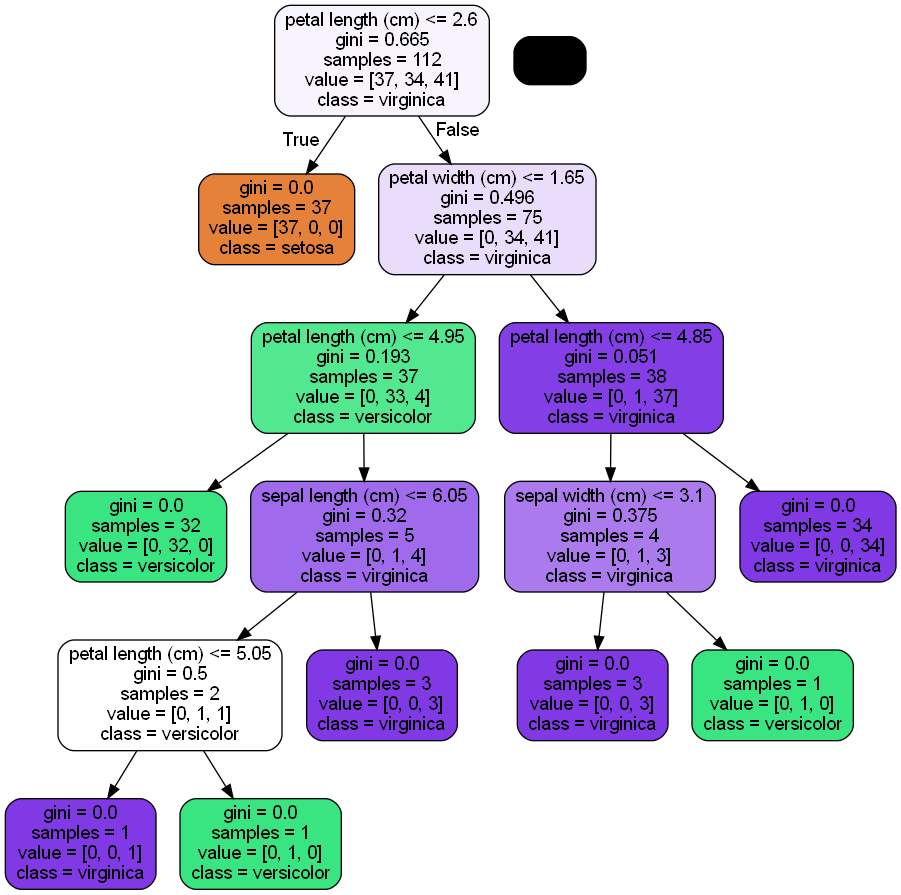

In [15]:
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names, class_names=iris.target_names,
                           filled=True, rounded=True, special_characters=False)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the graph as an image file (e.g., PNG)
graph.write_pdf('iris_tree.pdf')

# Display the image
Image(graph.create_png())

## Visualizing OR Tree using pydotplus and graphviz

In [16]:
# Create dataset for OR logic
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 1]

In [17]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

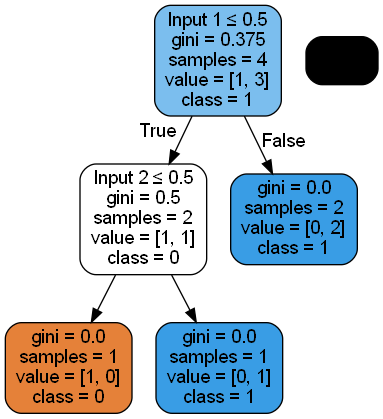

In [18]:
# Export the decision tree as a DOT file
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=['Input 1', 'Input 2'], 
                           class_names=['0', '1'], 
                           filled=True, rounded=True, special_characters=True)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the graph as an image file (e.g., PNG)
graph.write_pdf('or_tree.pdf')

# Display the image
Image(graph.create_png())


 NOTE : In the above two Decision Tree , I don't know why it is showing black box , I tried to remove it 
 but , it still didn't work . So , Below I am going to use plot_tree for visualization of decision tree , as it is 
 not showing any black box .

### Visualizing Decision Tree of Iris dataset and OR Table using plot_tree

In [19]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)

In [20]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

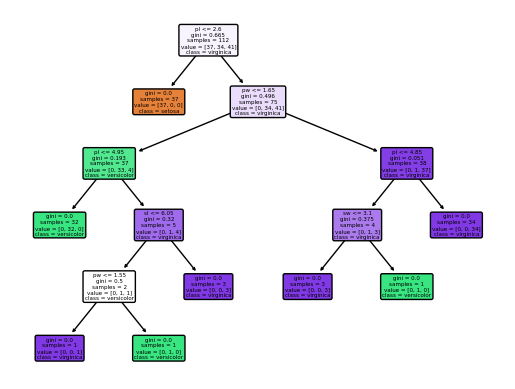

<Figure size 2000x1500 with 0 Axes>

In [26]:
plot_tree(clf, fontsize = 4, filled = True, feature_names = ['sl', 'sw', 'pl', 'pw'], 
         class_names = iris.target_names, rounded = True)
plt.figure('Iris Tree', figsize = [20, 15])
plt.show()

#### OR Table

In [27]:
# Create dataset for OR logic
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 1]

In [28]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

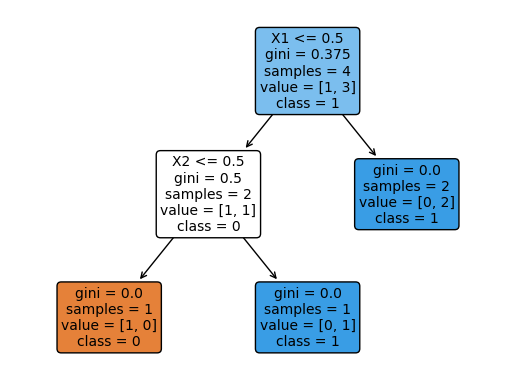

<Figure size 2000x1500 with 0 Axes>

In [29]:
plot_tree(clf , fontsize = 10, filled = True, feature_names = ['X1', 'X2'], 
         class_names = ['0', '1'], rounded = True)
plt.figure('OR table Tree', figsize = [20, 15])
plt.show()

## Thank you 🙂